In [1]:
from __future__ import division, print_function, unicode_literals
from __future__ import division, print_function, unicode_literals
from __future__ import print_function
from sklearn.naive_bayes import BernoulliNB
import numpy as np

# train data
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])  # 0 - B, 1 - N

# test data
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

## call MultinomialNB

clf = BernoulliNB()

# training

clf.fit(train_data, label)

# test

print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.76554295 0.23445705]]
Probability of d6 in each class: [[0.16948581 0.83051419]]


In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
from scipy.sparse import coo_matrix  # for sparse matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score  # for evaluating results

# data path and file name
path = 'ex6DataPrepared/'
train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'
nwords = 2500


def read_data(data_fn, label_fn):
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]
    with open(path + data_fn) as f:
        content = f.readlines()

    # remove '\n' at the end of each line
    content = [x.strip() for x in content]

    dat = np.zeros((len(content), 3), dtype=int)

    for i, line in enumerate(content):
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])

    # remember to -1 at coordinate since we're in Python
    # for more information about coo_matrix function
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)), shape=(len(label), nwords))
    return data, label


(train_data, train_label) = read_data(train_data_fn, train_label_fn)
(test_data, test_label) = read_data(test_data_fn, test_label_fn)

clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


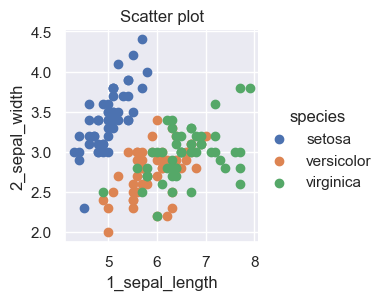

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
% matplotlib inline
sns.set()
iris = sns.load_dataset("iris")
iris = iris.rename(index=str, columns={'sepal_length': '1_sepal_length', 'sepal_width': '2_sepal_width',
                                       'petal_length': '3_petal_length', 'petal_width': '4_petal_width'})
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species").map(plt.scatter, "1_sepal_length", "2_sepal_width", ).add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width", 'species']]

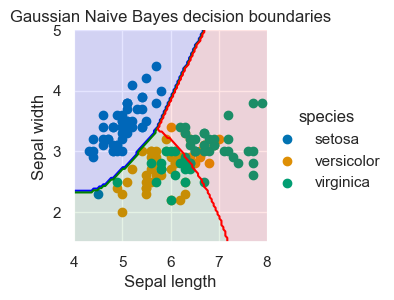

In [8]:
def predict_NB_gaussian_class(X, mu_list, std_list, pi_list):
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = (norm.pdf(x=X[0], loc=mu_list[p][0][0], scale=std_list[p][0][0]) * norm.pdf(x=X[1],
                                                                                            loc=mu_list[p][0][1],
                                                                                            scale=std_list[p][0][1]) *
                 pi_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)


def predict_Bayes_class(X, mu_list, sigma_list):
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
    scores_list.append(score)
    return np.argmax(scores_list)


#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values, [1, 2])
std_list = np.split(df1.groupby('species').std().values, [1, 2], axis=0)
pi_list = df1.iloc[:, 2].value_counts().values / len(df1)
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)
g = sns.FacetGrid(iris, hue="species", palette='colorblind').map(plt.scatter, "1_sepal_length",
                                                                 "2_sepal_width", ).add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array([predict_NB_gaussian_class(np.array([xx, yy]).reshape(-1, 1), mu_list, std_list, pi_list)
               for xx, yy in zip(np.ravel(X), np.ravel(Y))])
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf(X, Y, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X, Y, Z, 2, alpha=1, colors=('blue', 'green', 'red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\users\cosyt\pycharmprojects\mlbasic\venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\users\cosyt\pycharmpro

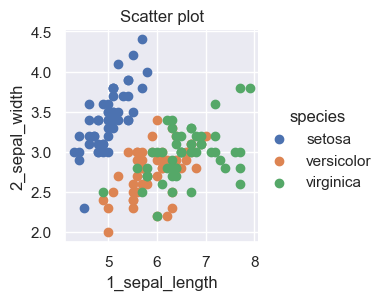

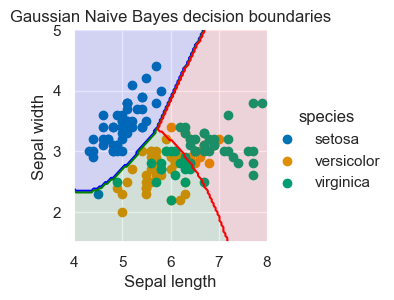

In [5]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
% matplotlib inline
sns.set()
#Load the data set

iris = sns.load_dataset("iris")
iris = iris.rename(index=str, columns={'sepal_length': '1_sepal_length', 'sepal_width': '2_sepal_width',
                                       'petal_length': '3_petal_length', 'petal_width': '4_petal_width'})
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species").map(plt.scatter, "1_sepal_length", "2_sepal_width", ).add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width", 'species']]

#Setup X and y data
X_data = df1.iloc[:, 0:2]
y_labels = df1.iloc[:, 2].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2}).copy()
#Fit model
model_sk = GaussianNB(priors=None)
model_sk.fit(X_data, y_labels)
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)
g = sns.FacetGrid(iris, hue="species", palette='colorblind').map(plt.scatter, "1_sepal_length",
                                                                 "2_sepal_width", ).add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array([model_sk.predict([[xx, yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y))])
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf(X, Y, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X, Y, Z, 2, alpha=1, colors=('blue', 'green', 'red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Xử lý loại bỏ các line dữ liệu thừa
from sklearn.naive_bayes import GaussianNB

with open('datacum.txt', 'r') as oFile, open('rawData.csv', 'w') as nFile:
    for line in oFile:
        if not line.startswith('#') and not line.startswith('\n'):
            nFile.write(line)
data = pd.read_csv('rawData.csv', header=None)
#chọn mẫu test
uBenign = data[data[1] == 2]  # u lành tính
uMalignant = data[data[1] == 4]  # u ác tính
testData = pd.concat([uBenign.sample(n=80, random_state=42), uMalignant.sample(n=40, random_state=42)])
trainData = data.drop(testData.index)
#training dữ liệu
X_train = trainData.drop([1], axis=1)
y_train = trainData[1]
gnb = GaussianNB()
gnb.fit(X_train, y_train)
X_test = testData.drop([1], axis=1)
y_test = testData[1]

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

precision = precision_score(y_test, y_pred, pos_label=2)
print("Precision: {:.2f}%".format(precision * 100))
#
recall = recall_score(y_test, y_pred, pos_label=4)
print("Recall: {:.2f}%".format(recall * 100))


Accuracy: 89.17%
Precision: 86.02%
Recall: 67.50%
